## Assignment 03: Sleeping habits

As a data scientist you will work with ordinal or categorical data as well. What are good methods to visualize such data? What are proper statistics to use? What needs to be done in the data preparation steps to conduct certain analysis. During this week we will work with data from a sleeping study. This dataset is not mandatory. You are encouraged to use data from your project when possible. It is also able to use an interesting source from the internet, as long as no notebooks are copied withouth reference. 

Keywords: statistics, categorical data, ordinal data, survey-based study of the sleeping, exploratory data analysis, normalization, hypothesis testing, p-value


More to read:
- https://fennaf.gitbook.io/bfvm22prog1/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/
There are a number of cheatsheets and tutorials on the internet. The next overview is a compact overview of tutorials
- https://www.kaggle.com/hamelg/python-for-data-21-descriptive-statistics
- https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions
- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals
- https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
- https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
- https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook
- https://www.kaggle.com/hamelg/python-for-data-27-linear-regression


You will learn about analysing data with pandas and numpy and you will learn to visualize with bokeh. Concretely, you will preprocess the Sleep Study data in an appropiate format in order to conduct statistical and visual analysis. 

Learning objectives
- Conduct exploratory data analysis for categarical data
- Provide statistical evidence of factor effect
- Maintain development environment 
- Apply coding standards and FAIR principles

Please add topics you want to learn here: <padlet>


## About the data

The data is collected from a survey-based study of the sleeping habits of individuals within the US. 

Below is a description of each of the variables contained within the dataset.

- Enough = Do you think that you get enough sleep?
- Hours = On average, how many hours of sleep do you get on a weeknight?
- PhoneReach = Do you sleep with your phone within arms reach?
- PhoneTime = Do you use your phone within 30 minutes of falling asleep?
- Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
- Breakfast = Do you typically eat breakfast?

The two research questions you should answer in this assignment are:
1. Is there a differences in Hours sleep caused by having breakfast (yes, no)?
2. Is there a differences in Hours sleep caused by having breakfast and the tireness (score)


The assignment consists of 6 parts:

- [part 1: load the data](#0)
- [part 2: data inspection](#1)
- [part 3: check assumptions](#2)
   - [check normality 3.1](#ex-31)
   - [check equal variance 3.2](#ex-32)
- [part 4: prepare the data](#3)
- [part 5: answer the research question](#4)
- [part 6: enhanced plotting](#5)

Part 1 till 5 are mandatory, part 6 is optional (bonus)
Mind you that you cannot copy code without referencing the code. If you copy code you need to be able to explain your code verbally and you will not get the full score. 


**NOTE If your project data is suitable you can use that data instead of the given data**

## ANOVA

Analysis of variance (ANOVA) compares the variances between groups versus within groups. It basically determines whether the differences between groups is larger than the differences within a group (the noise). 
A graph picturing this is as follow: https://link.springer.com/article/10.1007/s00424-019-02300-4/figures/2


In ANOVA, the dependent variable must be a continuous (interval or ratio) level of measurement. For instance Glucose level. The independent variables in ANOVA must be categorical (nominal or ordinal) variables. For instance trial category, time of day (AM versus PM) or time of trial (different categories). Like the t-test, ANOVA is also a parametric test and has some assumptions. ANOVA assumes that the data is normally distributed.  The ANOVA also assumes homogeneity of variance, which means that the variance among the groups should be approximately equal. ANOVA also assumes that the observations are independent of each other. 

A one-way ANOVA has just one independent variable. A two-way ANOVA (are also called factorial ANOVA) refers to an ANOVA using two independent variables. For research question 1 we can use the one-way ANOVA, for research question two we can use two-way ANOVA. But first we need to check the assumptions. 

If your data is not normally distributed you might want to look for an alternative. See also https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/


---

<a name='0'></a>
## Part 1: Load the data (10 pt)

load the `sleep.csv` data. 
Preferably we read the data not with a hard coded data path but using a config file. See https://fennaf.gitbook.io/bfvm22prog1/data-processing/configuration-files/yaml. Get yourself familiar with the data. Answer the following questions.

1. What is the percentage missing data?
2. Considering the research question, what is the dependent variable and what are the indepent variables? Are they of the correct datatype? 

In [1]:
# Imports
import pandas as pd
import numpy as np
import yaml

# Statistical
import statsmodels.api as sm
from statsmodels.formula.api import ols 
from scipy.stats import norm, levene, bartlett, f_oneway

# Import for the visualizations
import panel as pn
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.transform import factor_cmap, jitter
from bokeh.models import BasicTicker, ColorBar, LinearColorMapper, PrintfTickFormatter, ColumnDataSource, Whisker
from bokeh.transform import transform
from bokeh.palettes import Oranges256, Category10_5
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

---

In [2]:
# Function to read the given config file and fetch the parameters from the file
def read_config(config_file):
    with open(config_file, "r") as stream:
        config = yaml.safe_load(stream)
    return config

# Read the config file
config = read_config("config.yaml")

In [3]:
# Read the csv with the sleep data fetched from the config file
df_sleep = pd.read_csv(config["sleep_data"])

# Show the first 5 rows of the data frame
df_sleep.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


---

In [4]:
print(f"The dataframe consist of {df_sleep.shape[0]} rows and {df_sleep.shape[1]} columns.")

The dataframe consist of 104 rows and 6 columns.


In [5]:
# Print the percentage of missing data for each column
perc_missing = df_sleep.isna().sum() * 100 / len(df_sleep)
print(f"There percentage of missing data for every column in the dataframe is:\n{perc_missing}")

There percentage of missing data for every column in the dataframe is:
Enough        0.000000
Hours         1.923077
PhoneReach    0.000000
PhoneTime     0.000000
Tired         0.000000
Breakfast     0.000000
dtype: float64


In [6]:
"""
I choose to drop the NaN's, since the hours are unknown and these are important to answer the research questions.
"""
df_sleep.dropna(axis = 0, inplace=True)

In [7]:
# Print the dependent and independent variables for both research questions
print(f"The dependent variable of research question 1 is {df_sleep.columns[1]} and the independent variable is {df_sleep.columns[5]}.")

print(f"The dependent variable of research question 2 is {df_sleep.columns[1]} and the independent variables are {df_sleep.columns[5]} and {df_sleep.columns[4]}.")

The dependent variable of research question 1 is Hours and the independent variable is Breakfast.
The dependent variable of research question 2 is Hours and the independent variables are Breakfast and Tired.


In [8]:
# Print the datatypes
print(f"The columns of the data frame have the following datatypes:\n{df_sleep.dtypes}")
print("\nYes, they have the correct datatypes because the questions answered with text are string (Yes and No) and stored in objects. \
\nThe hours column has floating point numbers in the column so the datatype of the column is 'float64'. \
\nThe score in the column Tired has the datatype 'int64' because the score is answered with an integer.")

The columns of the data frame have the following datatypes:
Enough         object
Hours         float64
PhoneReach     object
PhoneTime      object
Tired           int64
Breakfast      object
dtype: object

Yes, they have the correct datatypes because the questions answered with text are string (Yes and No) and stored in objects. 
The hours column has floating point numbers in the column so the datatype of the column is 'float64'. 
The score in the column Tired has the datatype 'int64' because the score is answered with an integer.


---

<a name='1'></a>
## Part 2: Inspect the data (30 pt)

Inspect the data practically. Get an idea about how well the variable categories are balanced. Are the values of a variable equally divided? What is the mean value of the dependent variable? Are there correlations among the variables?


<ul>
<li>Create some meaningful overviews such as variable value counts</li>
<li>Create a scatter plot ploting the relation between being tired and hours of sleep with different colors for Breakfast</li>
    <li>Print some basic statistics about the target (mean, standard deviation)</li>
    <li>Create a heatmap to check for correlations among variables. </li>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>the gitbook has a bokeh heatmap example</li></ul>
</details>
</ul>

### The value counts and distribution plots

In [9]:
"""
I choose to visualize the value counts of the categorical data in a table.
Since these columns all have 'Yes' and 'No' I though a table is clear to view the data.
"""

print(f'The value counts of the categorical data columns are:\n\n{df_sleep[["Enough", "PhoneReach", "PhoneTime", "Breakfast"]].apply(pd.value_counts)}')

print("\nWhen we combine all the columns then we can see that the data is not balanced because in general there are quite a few people \
\nthat do not sleep enough and if we look at the other columns then we can see they probably use there phone before sleeping. \
\nThe counts in general are very different from each other.") 

The value counts of the categorical data columns are:

     Enough  PhoneReach  PhoneTime  Breakfast
No       67          31         19         41
Yes      35          71         83         61

When we combine all the columns then we can see that the data is not balanced because in general there are quite a few people 
that do not sleep enough and if we look at the other columns then we can see they probably use there phone before sleeping. 
The counts in general are very different from each other.


In [10]:
"""
I choose to visualize the value counts in a table to give a quick overview of the numerical 'Hours' column.
"""

print(f"The value counts of the column 'Hours' is:\n{df_sleep.Hours.value_counts().sort_index()}")

print("\nMost of the people sleep for 7 hours and the highest number of counts lie around the hours 6,7, and 8. \
In a quick overview the data looks normal distributed, however, there is one hour that is missing that could influence the distribution. \
\nSo you can't really say anything over how the data is distritibuted.")

The value counts of the column 'Hours' is:
2.0      2
4.0      4
5.0     12
6.0     24
7.0     35
8.0     16
9.0      8
10.0     1
Name: Hours, dtype: int64

Most of the people sleep for 7 hours and the highest number of counts lie around the hours 6,7, and 8. In a quick overview the data looks normal distributed, however, there is one hour that is missing that could influence the distribution. 
So you can't really say anything over how the data is distritibuted.


In [11]:
"""
I choose to visualize the value counts in a table to give a quick overview of the numerical 'Tired' column.
"""

print(f"The value counts of the column 'Tired' is:\n{df_sleep.Tired.value_counts().sort_index()}")

print("\nThe data looks normally distributed as 3, the middle, has the highest number of counts and the others decrease evenly. \
\nThe value also lie closely together like 1 and 5, and 2 and 4.")

The value counts of the column 'Tired' is:
1     4
2    26
3    39
4    23
5    10
Name: Tired, dtype: int64

The data looks normally distributed as 3, the middle, has the highest number of counts and the others decrease evenly. 
The value also lie closely together like 1 and 5, and 2 and 4.


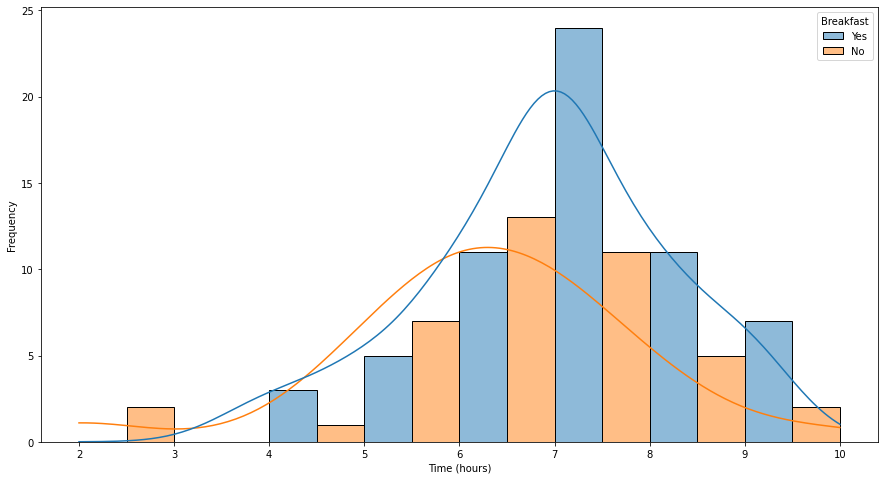

Between every whole number the bar left stands for 'Breakfast: Yes' and every right bar stands for 'Breakfast: No'. In general the histogram looks normally distributed. It looks even more normally distributed if the left side until 4 is removed, 
which are possibly outliers. 
The same goes for 'Breakfast: Yes' it looks to have a normal distribution, however, this is possibly only when the outliers 
on the left will be removed. The density lies more to the right instead of in the middle. The values look balanced because the count decreases almost evenly from 7 as middle point. 
The distribution of the 'Breakfast: No' also looks normal especially if the left side is removed. 
However, the shape of the kernel density shows that it has a better normal distribution than 'Yes'. 
If you look closely, it looks like that the data isn't normally distributed since it doesn't follow the lines at all places.


In [12]:
"""
I choose to visualize Hours in a histogram colored on Breakfast to see how Hours is distributed based on Breakfast.
And to see how Breakfast is ballanced over the Hours.
I also used a kernel density line to see the shape of the distribution.
"""

# Plot the histogram
plt.figure(figsize=(15,8))
p = sns.histplot(data=df_sleep, x="Hours", hue="Breakfast", binwidth=1, multiple="dodge", kde=True)
p.set(xlabel="Time (hours)", ylabel="Frequency")
plt.show()

print("Between every whole number the bar left stands for 'Breakfast: Yes' and every right bar stands for 'Breakfast: No'. \
In general the histogram looks normally distributed. It looks even more normally distributed if the left side until 4 is \
removed, \nwhich are possibly outliers. \nThe same goes for 'Breakfast: Yes' it looks to have a normal distribution, \
however, this is possibly only when the outliers \
\non the left will be removed. The density lies more to the right instead of in the middle. \
The values look balanced because the count decreases almost evenly from 7 as middle point. \
\nThe distribution of the 'Breakfast: No' also looks normal especially if the left side is removed. \
\nHowever, the shape of the kernel density shows that it has a better normal distribution than 'Yes'. \
\nIf you look closely, it looks like that the data isn't normally distributed since it doesn't follow the lines at all places.")

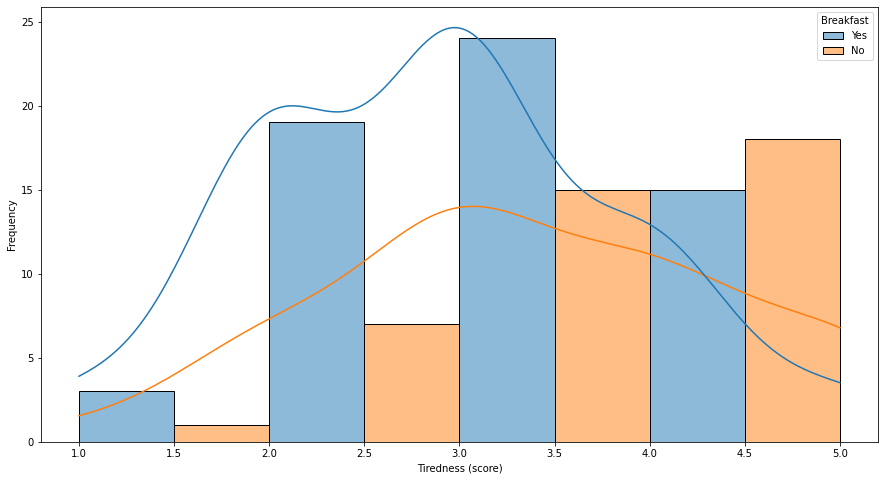

Between every whole number the bar left stands for 'Breakfast: Yes' and every right bar stands for 'Breakfast: No'. In general the histogram doesn't look normally distributed. It goes up and down and not with equal numbers. 
Both appear to have a left skewed distribution as the count goes up with each score. 
People who didn't ate breakfast a little bit more. 
The kernel density of both also doesn't show a normal distribution.


In [13]:
"""
I choose to visualize Tired in a histogram colored on Breakfast to see how Tired is distributed based on Breakfast.
And to see how Breakfast is ballanced based on how Tired people are.
I also used a kernel density line to see the shape of the distribution.
"""

# Plot the histogram
plt.figure(figsize=(15,8))
p = sns.histplot(data=df_sleep, x="Tired", hue="Breakfast", binwidth=1, multiple="dodge", kde=True)
p.set(xlabel="Tiredness (score)", ylabel="Frequency")
plt.show()

print("Between every whole number the bar left stands for 'Breakfast: Yes' and every right bar stands for 'Breakfast: No'. \
In general the histogram doesn't look normally distributed. It goes up and down and not with equal numbers. \
\nBoth appear to have a left skewed distribution as the count goes up with each score. \
\nPeople who didn't ate breakfast a little bit more. \
\nThe kernel density of both also doesn't show a normal distribution.")

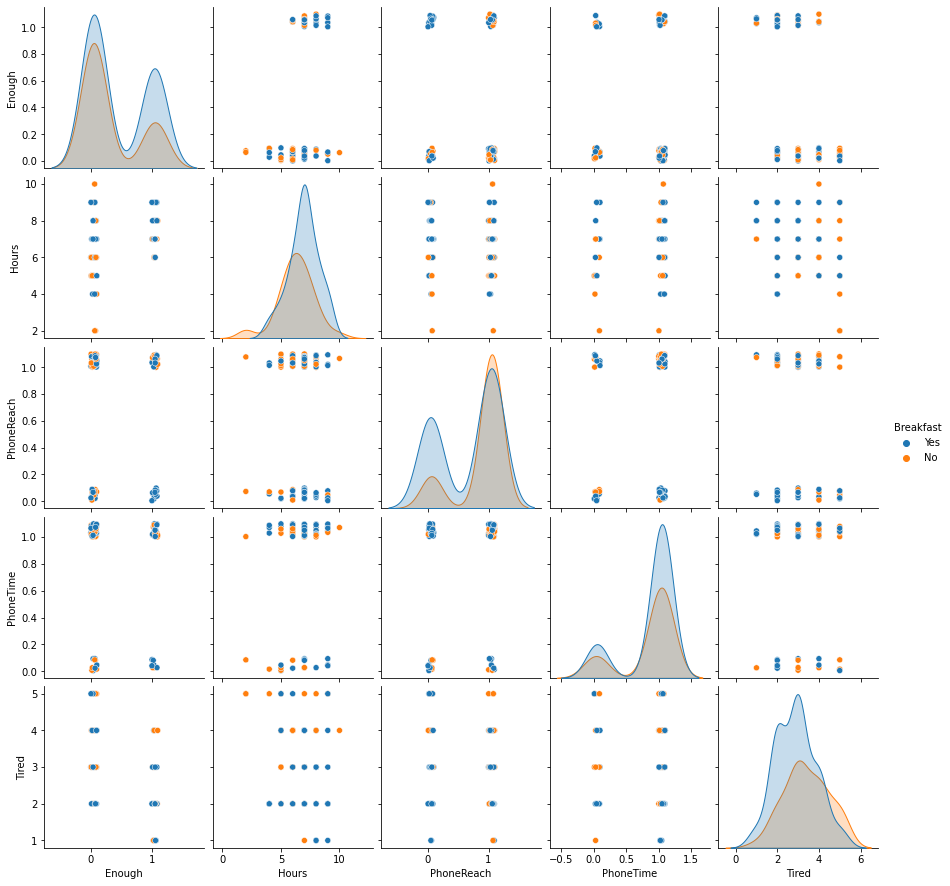

The plot gives a clear overview of the relationships between the variables. 
Since the data only has two values most of the plots give a straigth line or small clusters. For the categorical columns 
the data has two spikes in the density, one for 0 and one for 1.


In [14]:
"""
I choose to visualize the data in a pairplot to investigate relations between factors.
First I choose to create a new data frame where the categorial columns are replaced into numerical columns to visualize all colums.
Except for Breakfast because then you can see the difference between 'Yes' and 'No' instead of 0 and 1 which can be anything.
Then I made a new data frame where jitter is added to the data to see a better difference then when the points overlap.
At last, I plotted the pairplot where the points are colored on Breakfast.
"""

# Replace the 'Yes' and 'No' in the columns with 0 and 1, make numerical columns from categorical columns
df_sleep_num = df_sleep.copy()
for column in df_sleep_num[["Enough", "PhoneReach", "PhoneTime"]]:
    df_sleep_num[column].replace(["No", "Yes"], [0, 1], inplace=True)

# Adding jitter to the numerical columns that where replace for a better view
jittered_sleep = df_sleep_num.copy()
jittered_sleep[['PhoneReach', 'PhoneTime', 'Enough']] += np.random.rand(*jittered_sleep[['PhoneReach', 'PhoneTime', 'Enough']].shape) * 0.1

# Create a pairplot with the jittered data
sns.pairplot(data=jittered_sleep, hue="Breakfast")
plt.show()

print("The plot gives a clear overview of the relationships between the variables. \
\nSince the data only has two values most of the plots give a straigth line or small clusters. \
For the categorical columns \nthe data has two spikes in the density, one for 0 and one for 1.")

---

### Scatter plot

In [15]:
"""
I choose to visualize the Hours vs Tiredness in scatterplot colored on Breakfast to see its relation.
I used jitter to avoid the dots being plotted on top of each other and to give a better view of overlapping data points.
I choose alpha = 0.5 to make it more transparent and view overlapping better.
"""

BREAKFAST = ['Yes', 'No']

p = figure(width=900)
p.xaxis.axis_label = "Time (hours)"
p.yaxis.axis_label = "Tiredness (score)"

# Plot Hours vs Tired colored on Breakfast
p.scatter(x=jitter("Hours", width=0.5), y=jitter("Tired", width=0.5), source=df_sleep, legend_group="Breakfast", size=8, alpha=0.5,
          color=factor_cmap("Breakfast", "Category10_3", BREAKFAST))

# Show
show(p)

print("You can see that most of the participants sleep between 6 and 8 hours. Most of the people have a tiredness score of 3 or 4. \
\nYou can clearly see that people who sleep more also ate breakfast and people who sleep less didn't had breakfast. \
\nSo around 7 and 8 with a tiredness score of 3, most people ate breakfast because there are more blue points. \
Around 6 hours of sleep with a score of 3, most people didn't had breakfast colored in orange. \
There are more orange points on the left and more blue points on the right.")

You can see that most of the participants sleep between 6 and 8 hours. Most of the people have a tiredness score of 3 or 4. 
You can clearly see that people who sleep more also ate breakfast and people who sleep less didn't had breakfast. 
So around 7 and 8 with a tiredness score of 3, most people ate breakfast because there are more blue points. Around 6 hours of sleep with a score of 3, most people didn't had breakfast colored in orange. There are more orange points on the left and more blue points on the right.


---

### Target statistics of the dependent variable

In [16]:
"""
I choose describe to make a quick overview of the basic statistics.
"""

print(f"The basic statistics of the dependent variable are:\n{df_sleep.Hours.describe()}")

The basic statistics of the dependent variable are:
count    102.000000
mean       6.656863
std        1.417676
min        2.000000
25%        6.000000
50%        7.000000
75%        7.000000
max       10.000000
Name: Hours, dtype: float64


You can clearly see that there are 4 outliers. The mean as described above lies within 6 and 7 which you can see. 
Everything described above can be seen, however, not the excact values but it give a great overview of the Hours.


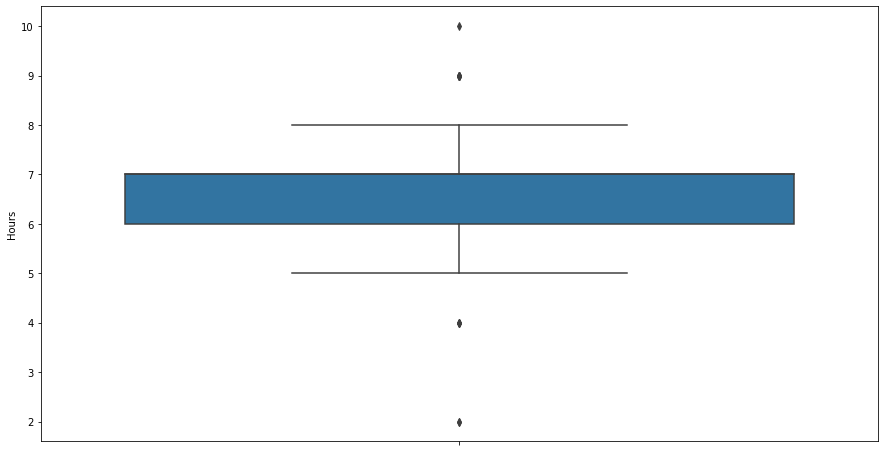

In [17]:
"""
I choose to make a boxplot of the column 'Hours' to see the distribution of quantitative data. Just as described above.
"""

plt.figure(figsize=(15,8))

# Plot the boxplot
sns.boxplot(data=df_sleep, y="Hours")

print("You can clearly see that there are 4 outliers. The mean as described above lies within 6 and 7 which you can see. \
\nEverything described above can be seen, however, not the excact values but it give a great overview of the Hours.")

Not all data is on one line because there are two points that lie outside of the line. 
The data also does not run from ~ -3 to ~ 3 but starts around ~ -2 until ~ 3. So it is not normal distributed.


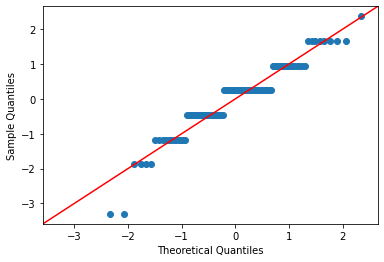

In [18]:
"""
I choose to make a qqplot to determine if the data of Hours is normally distributed.
"""

# Plot the qqplot
sm.qqplot(df_sleep.Hours, fit=True, line="45")

print("Not all data is on one line because there are two points that lie outside of the line. \
\nThe data also does not run from ~ -3 to ~ 3 but starts around ~ -2 until ~ 3. \
So it is not normal distributed.")

---

### Heatmap

In [19]:
"""
I used the heatmap from the gitbook as reference. The heatmap shows the correlations between the variables.
I used the Oranges256 palette reversed for the colors in the heatmap so that a cold color means 
not correlated and a warm color means correlated.
"""

# Get the correlations
df_c = df_sleep_num.corr()

# Define the ranges of the heatmap
x_range = (list(df_c.index))
y_range = (list(reversed(df_c.columns)))

# Create a correlation data frame
df_corr = pd.DataFrame(df_c.stack(), columns=["r"]).reset_index()

# Create the color mapper 
color_mapper = LinearColorMapper(palette=Oranges256[::-1], low=df_corr.r.min(), high=df_corr.r.max())

# Create the heatmap
p = figure(title="Correlation Heatmap", plot_width=700,
           x_range=x_range, y_range=y_range, x_axis_location="above", toolbar_location=None)

# Fill the rectangles in the heatmap with the color mapper
p.rect(x="level_0", y="level_1", width=1, height=1, source=df_corr,
       line_color=None, fill_color=transform("r", color_mapper))

# Create the color bar
color_bar = ColorBar(color_mapper=color_mapper, location=(0, 0),
                     ticker=BasicTicker(desired_num_ticks=len(x_range)), 
                     formatter=PrintfTickFormatter(format="%.1f"))
# Add the color bar
p.add_layout(color_bar, "right")

# Draw the axis
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "12px"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = 1

# Show the heatmap
show(p)

print("Based on the heatmap you can see that 'Tired' and 'Enough' aren't correlated compared to the other variables. \
\nThe variables colored dark red are correlated with themselves. 'Hours' and 'Enough' are the most \
correlated compared to the \nothers. 'PhoneReach' is the second most correlated with 'Enough' and 'Hours'.")

Based on the heatmap you can see that 'Tired' and 'Enough' aren't correlated compared to the other variables. 
The variables colored dark red are correlated with themselves. 'Hours' and 'Enough' are the most correlated compared to the 
others. 'PhoneReach' is the second most correlated with 'Enough' and 'Hours'.


---

<a name='2'></a>
## Part 3: Check Assumptions

Before we answer the research question with ANOVA we need to check the following assumptions:

1. ANOVA assumes that the dependent variable is normaly distributed
2. ANOVA also assumes homogeneity of variance
3. ANOVA also assumes that the observations are independent of each other. Most of the time we need domain knowledge and experiment setup descriptions to estimate this assumption

We are going to do this graphically and statistically. 

<a name='ex-31'></a>
### Check normality (10 pt)

<ul><li>
Plot the distribution of the dependent variable. Add a vertical line at the position of the average. Add a vertical line for the robuust estimation. Add the normal distribution line to the plot. Comment on the normallity of the data. Do you want the full points? Plot with bokeh!</li>

<li>Use a Shapiro-Wilk Test or an Anderson-Darling test to check statistically</li></ul>


<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>check the code of lesson 1 DS1 bayesian statistics</li>
        <li>heart_failure case of gitbook uses bokeh histograms</li>
</ul>
</details>

In [20]:
"""
I used bokeh to visualize the histogram together with the lines of the average, robust estimation, and the normal distribution.
"""

hours = df_sleep.Hours
mu = np.mean(hours) # Mean of the data
mu_R = np.median(hours) # Robust estimate

sigma = np.std(hours) # Standard deviation

# Define figure
p = figure(width=700, toolbar_location=None, title="")

# Plot the histogram
hist, edges = np.histogram(hours, bins=9) # Bins=9 otherwise it will look like there is missing data between 5 and 6
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
      fill_color="steelblue", line_color="white",
      legend_label="Hours")

# Add a vertical line at the position of the average
p.line(x=mu, y=[0, max(hours.value_counts())], legend_label="Average", line_width=2, line_color="orange")

# Add a vertical line for the robust estimation 
p.line(x=mu_R, y=[0, max(hours.value_counts())], legend_label="Robust Estimate", line_dash="6 5", 
       line_width=2, line_color="orange")

# Create an array with x values
x = np.linspace(min(hours), max(hours), 100)

# Calculate the normal distribution
pdf = norm.pdf(x, mu, sigma)
# Normalize the curve to match the histogram height
pdf *= max(hist) / max(pdf)

# Add a line for the normal distribution
p.line(x=x, y=pdf, legend_label="Normal Distribution", line_width=2, line_color="orange")

# Define axis labels
p.xaxis.axis_label = "Time (hours)"
p.yaxis.axis_label = "Frequency"

# Show the plot
show(p)

---

In [21]:
"""
I created a file that I import with the anderson darling test from the course bayesian statistics.
This function gives a great overview of the anderson darling test.
"""

from AndersonDarling import DS_AndersonDarling_test_normal

DS_AndersonDarling_test_normal(hours)

print("\nThe data doesn't look normally distributed as seen in the histogram, since it is not following the line everywhere. \
\nThe anderson darling test has a p-value of 8.92e-07, which is lower than the alpha (0.05), thus p < 0.05. \
\nThus the H0 is rejected and the H1 is accepted, meaning that the data doesn't follow a normal distribution.")

--------------------------------------------------------------------------------
Anderson-Darling-test for normality of data:
     assuming Normal(mu | sigma2) data for dataset
y.av = 6.66, s = 1.42, n = 102, alpha = 0.05
H0: data follows normal distribution
H1: data does not follow normal distribution
AD = 2.67, AD* = 2.69, p-value = 8.92e-07, AD*.crit = 0.753
--------------------------------------------------------------------------------

The data doesn't look normally distributed as seen in the histogram, since it is not following the line everywhere. 
The anderson darling test has a p-value of 8.92e-07, which is lower than the alpha (0.05), thus p < 0.05. 
Thus the H0 is rejected and the H1 is accepted, meaning that the data doesn't follow a normal distribution.


<a name='ex-32'></a>
### Check homogeneity of variance (20 pt)

<ul><li>
Use boxplots for the check of homogeneity of variance. Do you want the full points? Plot with bokeh!</li>

<li>Use a Levene’s & Bartlett’s Test of Equality (Homogeneity) of Variance to test equal variance statistically</li><ul>

---

In [22]:
"""
I choose to visualize Hours vs Tired and Hours vs Breakfast in a boxplot.
I used a dropdown button to select one of these (Tired or Breakfast). I choose this because I wanted the visualize everything
in one plot but it didn't work so I made a dropdown button. And because plotting two different boxplots in two different cells
take a lot of space. This gives a better overview.
I used the boxplot of bokeh to create the basics: https://docs.bokeh.org/en/3.0.2/docs/examples/topics/stats/boxplot.html
"""

# Load extension
pn.extension()

# Make a copy of the data frame and convert the 'Tired' column to a string
df_sleep_box = df_sleep.copy()
df_sleep_box.Tired = df_sleep_box.Tired.astype("str")

# Function the create a boxplot based on the selected x-value
def render_boxplot(x):
    # Make a shorter data frame
    df = df_sleep_box[["Tired", "Hours", "Breakfast"]]
    
    # Get the uniques of the x-value and sort
    x_unique = df[x].unique()
    x_unique = np.sort(x_unique)
    
    # Define the x-axis label based on the selected x-value
    x_label = "Tiredness (score)" if x == "Tired" else "Breakfast"

    # Compute quantiles
    qs = df.groupby(x).Hours.quantile([0.25, 0.5, 0.75])
    qs = qs.unstack().reset_index()
    qs.columns = [x, "q1", "q2", "q3"]
    df = pd.merge(df, qs, on=x, how="left")

    # Compute IQR outlier bounds
    iqr = df.q3 - df.q1
    df["upper"] = df.q3 + 1.5*iqr
    df["lower"] = df.q1 - 1.5*iqr

    source = ColumnDataSource(df)

    # Define figure layout
    p = figure(x_range=x_unique, y_range=(-2, 14), toolbar_location=None,
               title=f"Time (hours) distribution by {x_label}",
               x_axis_label=x_label, y_axis_label="Time (hours)")

    # Outlier range
    whisker = Whisker(base=x, upper="upper", lower="lower", source=source)
    whisker.upper_head.size = whisker.lower_head.size = 20
    p.add_layout(whisker)

    # Quantile boxes
    cmap = factor_cmap(x, Category10_5, x_unique)
    p.vbar(x, 0.7, "q2", "q3", source=source, color=cmap, line_color="black")
    p.vbar(x, 0.7, "q1", "q2", source=source, color=cmap, line_color="black")

    # Outliers
    outliers = df[~df.Hours.between(df.lower, df.upper)]
    p.scatter(x, "Hours", source=outliers, size=6, color="black")

    p.xgrid.grid_line_color = None

    return p

# Create the interation
interactive_plot = pn.interact(render_boxplot, x=["Breakfast", "Tired"])

# Define the layout
boxgrid = pn.Row(pn.Column("Choose an x-value:", interactive_plot[0]), interactive_plot[1])

# Show the boxplots
boxgrid

Row
    [0] Column
        [0] Markdown(str)
        [1] Column
            [0] Select(name='x', options=['Breakfast', 'Tired'], value='Breakfast')
    [1] Row
        [0] Bokeh(Figure, name='interactive00101')

---

In [23]:
"""
Levene's test
I choose to perform the test on hours vs breakfast (yes and no) and hours vs tired.
Also on hours vs tired with breakfast is yes and on hours vs tired with breakfast is no.
The columns are of interest and have a range that can be tested.
"""

# Performing Levene's test
levene_breakfast = levene(df_sleep.Hours[df_sleep.Breakfast == "Yes"],
                          df_sleep.Hours[df_sleep.Breakfast == "No"])

levene_tired = levene(df_sleep.Hours, df_sleep.Tired)

levene_tired_yes_b = levene(df_sleep.Hours[df_sleep.Breakfast == "Yes"],
                            df_sleep.Tired[df_sleep.Breakfast == "Yes"])

levene_tired_no_b = levene(df_sleep.Hours[df_sleep.Breakfast == "No"],
                           df_sleep.Tired[df_sleep.Breakfast == "No"])

print(f"1: p-value for Levene's test Hours, Breakfast (yes) vs Hours, Breakfast (no): \033[1m{levene_breakfast[1]}\033[0m")
print(f"\n2: p-value for Levene's test Hours vs Tired: \033[1m{levene_tired[1]}\033[0m")
print(f"\n3: p-value for Levene's test Hours, Breakfast (yes) vs Tired, Breakfast (yes): \033[1m{levene_tired_yes_b[1]}\033[0m")
print(f"\n4: p-value for Levene's test Hours, Breakfast (no) vs Tired, Breakfast (no): \033[1m{levene_tired_no_b[1]}\033[0m")

1: p-value for Levene's test Hours, Breakfast (yes) vs Hours, Breakfast (no): 0.3270310216888861

2: p-value for Levene's test Hours vs Tired: 0.02573520664256973

3: p-value for Levene's test Hours, Breakfast (yes) vs Tired, Breakfast (yes): 0.1636109239029688

4: p-value for Levene's test Hours, Breakfast (no) vs Tired, Breakfast (no): 0.20225955211394833


*The Levene test tests the null hypothesis that all input samples are from populations with equal variances.*

For the first test the p_value (0.3270310216888861) is greater than alpha (0.05). This means that p > 0.05 is thus it failed to reject H0. So the groups are not significantly different from each other and have equal variances.

For the second test the p_value (0.02573520664256973) is smaller than alpha (0.05). This means that p < 0.05 is thus it rejects H0. So the groups are significantly different from each other and have no equal variances.

For the third test the p_value (0.1636109239029688) is greater than alpha (0.05). This means that p > 0.05 is thus it failed to reject H0. So the groups are not significantly different from each other and have equal variances.

For the fourth test the p_value (0.20225955211394833) is greater than alpha (0.05). This means that p > 0.05 is thus it failed to reject H0. So the groups are not significantly different from each other and have equal variances.

---

In [24]:
"""
Bartlett's test
I choose to perform the test on hours vs breakfast (yes and no) and hours vs tired.
Also on hours vs tired with breakfast is yes and on hours vs tired with breakfast is no.
The columns are of interest and have a range that can be tested.
"""

# Performing Bartlett's test
bartlett_breakfast = bartlett(df_sleep.Hours[df_sleep.Breakfast == "Yes"],
                              df_sleep.Hours[df_sleep.Breakfast == "No"])

bartlett_tired = bartlett(df_sleep.Hours, df_sleep.Tired)

bartlett_tired_yes_b = bartlett(df_sleep.Hours[df_sleep.Breakfast == "Yes"],
                                df_sleep.Tired[df_sleep.Breakfast == "Yes"])

bartlett_tired_no_b = bartlett(df_sleep.Hours[df_sleep.Breakfast == "No"],
                               df_sleep.Tired[df_sleep.Breakfast == "No"])

print(f"1: p-value for Bartlett's test Hours, Breakfast (yes) vs Hours, Breakfast (no): \033[1m{bartlett_breakfast[1]}\033[0m")
print(f"\n2: p-value for Bartlett's test Hours vs Tired: \033[1m{bartlett_tired[1]}\033[0m")
print(f"\n3: p-value for Bartlett's test Hours, Breakfast (yes) vs Tired, Breakfast (yes): \033[1m{bartlett_tired_yes_b[1]}\033[0m")
print(f"\n4: p-value for Bartlett's test Hours, Breakfast (no) vs Tired, Breakfast (no): \033[1m{bartlett_tired_no_b[1]}\033[0m")

1: p-value for Bartlett's test Hours, Breakfast (yes) vs Hours, Breakfast (no): 0.16396309698862105

2: p-value for Bartlett's test Hours vs Tired: 0.000925972863551918

3: p-value for Bartlett's test Hours, Breakfast (yes) vs Tired, Breakfast (yes): 0.02686034478412691

4: p-value for Bartlett's test Hours, Breakfast (no) vs Tired, Breakfast (no): 0.014682847227819451


*Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances.*

For the first test the p_value (0.16396309698862105) is greater than alpha (0.05). This means that p > 0.05 is thus it failed to reject H0. So the groups are not significantly different from each other and have equal variances.

For the second test the p_value (0.000925972863551918) is smaller than alpha (0.05). This means that p < 0.05 is thus it rejects H0. So the groups are significantly different from each other and have no equal variances.

For the third test the p_value (0.02686034478412691) is smaller than alpha (0.05). This means that p < 0.05 is thus it rejects H0. So the groups are significantly different from each other and have no equal variances.

For the fourth test the p_value (0.014682847227819451) is smaller than alpha (0.05). This means that p < 0.05 is thus it rejects H0. So the groups are significantly different from each other and have no equal variances.

---

<a name='3'></a>
## Part 4: Prepare your data (10 pt)

Create a dataframe with equal samplesize. Make three categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes

In [25]:
# Copy the data frame to make a new one
df_sleep_new = df_sleep.copy()

# Make categories for tireness 1-2 = no, 3 = maybe, 4-5 = yes
df_sleep_new.Tired = df_sleep_new.Tired.map({1: "No", 2: "No", 3: "Maybe", 4: "Yes", 5: "Yes"})

---

<a name='4'></a>
## Part 5: Answer the research questions (20 pt)

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
    <ul><li>use one-way ANOVA for research question 1</li>
    <li>Use two-way ANOVA for research question 2</li>
    <li>https://reneshbedre.github.io/blog/anova.html</li>
</ul>
</details>

In [26]:
# Perform one-way ANOVA for research question 1
one_way = f_oneway(df_sleep_new.Hours[df_sleep_new.Breakfast == "Yes"],
                   df_sleep_new.Hours[df_sleep_new.Breakfast == "No"]) 
print(f"The p-value for research question 1 performed with the one-way ANOVA is: {one_way[1]}")

# Perform two-way ANOVA for research question 2
formula = 'Hours ~ C(Breakfast) + C(Tired) + C(Breakfast):C(Tired)'
model = ols(formula, data=df_sleep).fit()
two_way = sm.stats.anova_lm(model, typ=2)

print(f"\nTwo-way ANOVA for research question 2 is:\n{two_way}\n")

The p-value for research question 1 performed with the one-way ANOVA is: 0.022483055685484282

Two-way ANOVA for research question 2 is:
                           sum_sq    df         F    PR(>F)
C(Breakfast)             6.678790   1.0  3.500622  0.064524
C(Tired)                13.000900   4.0  1.703574  0.155917
C(Breakfast):C(Tired)    4.112491   4.0  0.538881  0.707524
Residual               175.525553  92.0       NaN       NaN



*1: Is there a differences in Hours sleep caused by having breakfast (yes, no)?*  
**H0:** There is no difference in hours of sleep caused by having breakfast.  
**H1:** There is a difference in hours of sleep caused by having breakfast.

The p-value for this research question is 0.022483055685484282, which is smaller than the alpha (0.05) and thus p < 0.05.  
It rejects the H0, so it accepts H1 and thus there is a difference in hours of sleep caused by having breakfast.

---

*2: Is there a differences in Hours sleep caused by having breakfast and the tireness (score)*  
**H0:** There is no difference in hours of sleep caused by having breakfast and the tiredness score.  
**H1:** There is a difference in hours of sleep caused by having breakfast and the tiredness score. 

The p-values for this research question are all greater than the alpha (0.05), p > 0.05.  
So it failed to reject the H0, so it accepts H0 and thus there is no difference in hours of sleep caused by having breakfast and the tiredness score.

---

<a name='5'></a>
## Part 6: Enhanced plotting (20 pt)

Create a panel with 1) your dataframe with equal samplesize 2) a picture of a sleeping beauty, 3) the scatter plot of tired / hours of sleep with different colors for Breakfast from part 2 4) the boxplots given the p-value for the anova outcome in the title

In [27]:
# I didn't do this for now but I will still try do it, to learn how to build a panel.